In [1]:
import pandas as pd
import ssl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

ssl._create_default_https_context = ssl._create_unverified_context

# Features

In [20]:
df = pd.read_csv('/Users/ira/Downloads/REALEC_Inspector/data/feature_result.csv')
df = df[df['type'] != 4]
df['sum_punct'] = df[['punct_mistakes_pp', 'punct_mistakes_because',
                      'punct_mistakes_but', 'punct_mistakes_compare',]].sum(axis=1)
df = df.round(2)
df.head(3)

,av_depth,max_depth,min_depth,num_acl,num_rel_cl,num_advcl,num_sent,num_tok,av_tok_before_root,av_len_sent,...,punct_mistakes_because,punct_mistakes_but,punct_mistakes_compare,million_mistake,side_mistake,name,text,class,type,sum_punct
0,3.56,6,2,2,0,1,18,244,4.39,13.56,...,0,0,0,0,0,./data/exam/exam2017/OBy_146_1,This two line graphs illustrates monthly avera...,60,1,0
1,5.43,10,4,1,3,1,7,175,6.29,25.00,...,0,0,0,0,0,./data/exam/exam2017/EGe_15_1,"﻿We have two graphics, which show us the popul...",65,1,0
2,3.81,6,0,5,0,13,16,292,4.56,18.25,...,0,1,0,0,0,./data/exam/exam2017/DOv_2_2,More and more young people are stunding on the...,60,2,1


In [77]:
df[df['punct_mistakes_compare'] != 0].shape

(173, 77)

In [76]:
df.shape

(3441, 77)

In [21]:
targets = []
for t in df['class']:
    if int(t) >= 70:
        targets.append('best')
    else:
        targets.append('not_best')
df['class'] = targets

In [22]:
set(df['type'].to_list())

{1, 2}

In [23]:
def plot_box_plot(feature, df):
    sns_plt = sns.boxplot(x="class", y=feature, data=df, palette="Set2")
    return sns_plt

In [24]:
df_1 = df[df['type'] == 1]
df_2 = df[df['type'] == 2]

In [25]:
feature_columns = list(df.columns)
feature_columns.remove('class')
feature_columns.remove('name')
feature_columns.remove('text')
feature_columns.remove('type')

In [26]:
for feature in feature_columns:
    sns_plt = plot_box_plot(feature, df_1)
    sns_plt.figure.savefig('/Users/ira/Downloads/REALEC_Inspector/graphs/boxplots/type_1/'+ feature +'_boxplot.png')
    plt.clf()

<Figure size 432x288 with 0 Axes>

In [27]:
for feature in feature_columns:
    sns_plt = plot_box_plot(feature, df_2)
    sns_plt.figure.savefig('/Users/ira/Downloads/REALEC_Inspector/graphs/boxplots/type_2/'+ feature +'_boxplot.png')
    plt.clf()

<Figure size 432x288 with 0 Axes>

In [28]:
for feature in feature_columns:
    sns_plt = plot_box_plot(feature, df)
    sns_plt.figure.savefig('/Users/ira/Downloads/REALEC_Inspector/graphs/boxplots/together/'+ feature +'_boxplot.png')
    plt.clf()

<Figure size 432x288 with 0 Axes>

# Line of the feature

In [38]:
import numpy as np

In [66]:
def plot_line(list_values, feature):
    sorted_list_values = sorted(list_values)
    df = pd.DataFrame(data = {'number': range(len(sorted_list_values)),
                              feature: sorted_list_values})
    ax = sns.lineplot(x='number', y=feature, data=df, palette="Set2")
    return ax

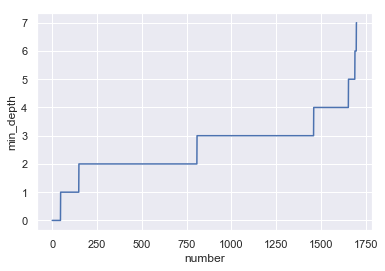

In [67]:
list_values = df_1['min_depth'].tolist()
sns_plt = plot_line(list_values, 'min_depth')

In [69]:
for feature in feature_columns:
    list_values = df_1[feature].tolist()
    sns_plt = plot_line(list_values, feature)
    sns_plt.figure.savefig('/Users/ira/Downloads/REALEC_Inspector/graphs/lines/type_1/'+ feature +'_line.png')
    plt.clf()

<Figure size 432x288 with 0 Axes>

In [70]:
for feature in feature_columns:
    list_values = df_2[feature].tolist()
    sns_plt = plot_line(list_values, feature)
    sns_plt.figure.savefig('/Users/ira/Downloads/REALEC_Inspector/graphs/lines/type_2/'+ feature +'_line.png')
    plt.clf()

<Figure size 432x288 with 0 Axes>

In [71]:
for feature in feature_columns:
    list_values = df[feature].tolist()
    sns_plt = plot_line(list_values, feature)
    sns_plt.figure.savefig('/Users/ira/Downloads/REALEC_Inspector/graphs/lines/together/'+ feature +'_line.png')
    plt.clf()

<Figure size 432x288 with 0 Axes>

In [ ]:
пше